In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows', None)

In [3]:
df= pd.read_csv("C:/Users/akrit/Downloads/employee_experience_survey_data.csv")

### Summary Statistics:

In [4]:
df

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree
5,Sara Ahmed,45-54,Male,Middle Eastern,Business Consultant,Operations,2024-10-09,Disagree,Strongly Disagree,Neutral,Neutral,Agree,Agree,Disagree,Neutral,Agree,Strongly Disagree,Neutral
6,Tom Davis,25-34,Male,Caucasian,UX Designer,HR,2024-10-08,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Agree
7,Linda Lopez,18-24,Male,African American,Customer Support,Product Development,2024-10-10,Disagree,Agree,Neutral,Strongly Disagree,Strongly Disagree,Agree,Neutral,Agree,Disagree,Disagree,Agree
8,Raj Patel,35-44,Female,Indian,Product Manager,IT,2024-10-07,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Strongly Agree,Agree,Agree,Neutral,Agree,Strongly Agree,Disagree
9,Amara Njeri,18-24,Male,African American,HR Specialist,Design,2024-10-10,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Disagree,Neutral,Agree,Neutral,Neutral,Strongly Disagree


<Axes: >

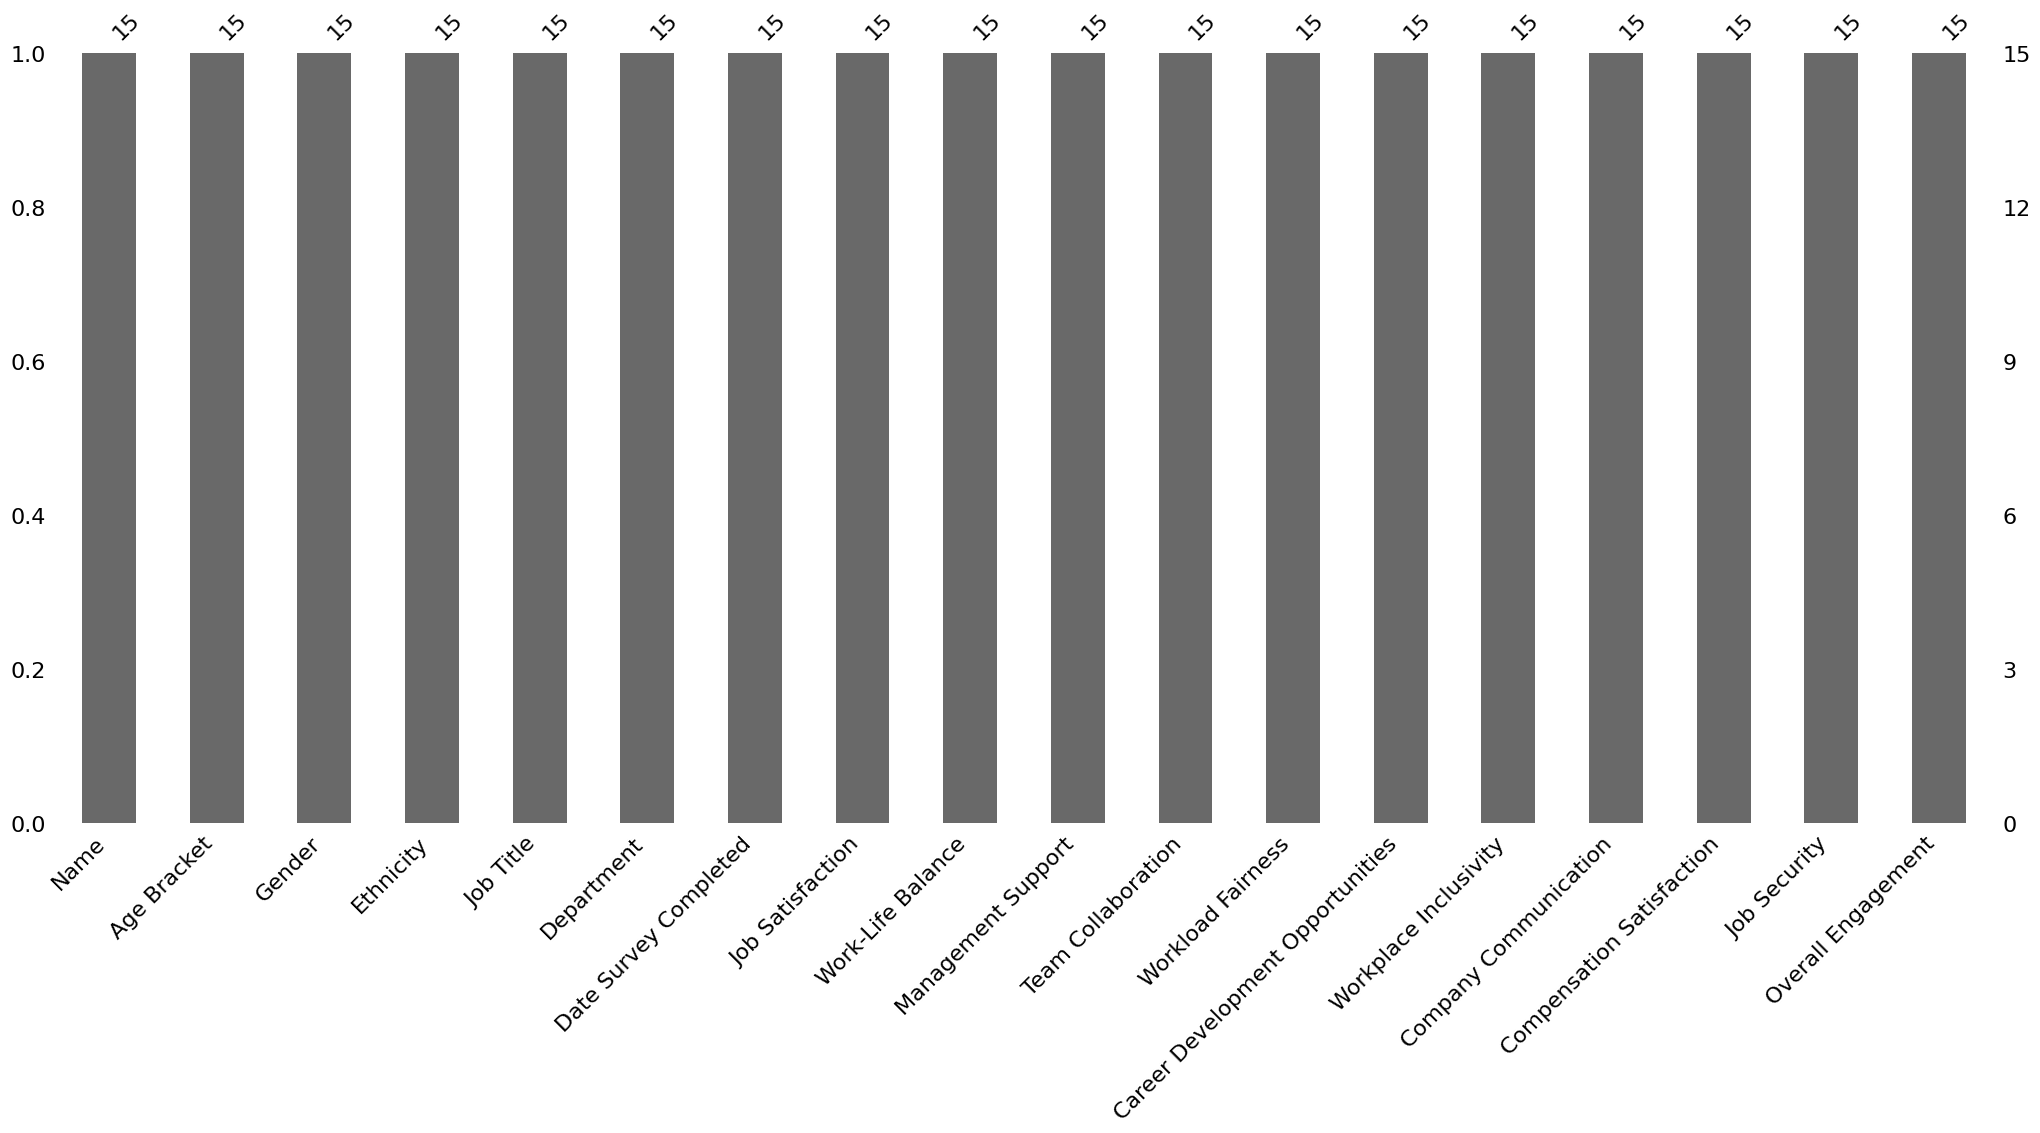

In [5]:
msno.bar(df)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              15 non-null     object
 1   Age Bracket                       15 non-null     object
 2   Gender                            15 non-null     object
 3   Ethnicity                         15 non-null     object
 4   Job Title                         15 non-null     object
 5   Department                        15 non-null     object
 6   Date Survey Completed             15 non-null     object
 7   Job Satisfaction                  15 non-null     object
 8   Work-Life Balance                 15 non-null     object
 9   Management Support                15 non-null     object
 10  Team Collaboration                15 non-null     object
 11  Workload Fairness                 15 non-null     object
 12  Career Development Oppor

In [7]:
for colms in df.describe(include='object').columns:
    print(colms)
    print(df[colms].unique())

Name
['John Doe' 'Jane Smith' 'Carlos Reyes' 'Emily Zhang' 'Michael Johnson'
 'Sara Ahmed' 'Tom Davis' 'Linda Lopez' 'Raj Patel' 'Amara Njeri'
 'Helen Martin' 'Peter Brown' 'Nina Roberts' 'Jake Williams'
 'Aisha Thompson']
Age Bracket
['25-34' '18-24' '45-54' '35-44']
Gender
['Female' 'Male']
Ethnicity
['Asian' 'Middle Eastern' 'Indian' 'Caucasian' 'African American'
 'Hispanic']
Job Title
['Product Manager' 'Operations Manager' 'UX Designer'
 'Business Consultant' 'Customer Support' 'HR Specialist'
 'Sales Executive' 'Data Analyst']
Department
['Product Development' 'Sales' 'Consulting' 'HR' 'Operations' 'IT'
 'Design' 'Finance']
Date Survey Completed
['2024-10-05' '2024-10-07' '2024-10-08' '2024-10-09' '2024-10-10'
 '2024-10-12' '2024-10-11']
Job Satisfaction
['Disagree' 'Agree' 'Neutral' 'Strongly Agree' 'Strongly Disagree']
Work-Life Balance
['Strongly Agree' 'Strongly Disagree' 'Agree' 'Neutral' 'Disagree']
Management Support
['Neutral' 'Strongly Agree' 'Agree' 'Disagree' 'Strongl

In [8]:
# df.columns

df.columns= df.columns.str.strip().str.replace(" ","_").str.replace("-","_")


mapping the values 

In [9]:
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()

col=['Job_Satisfaction', 'Work_Life_Balance', 'Management_Support', 
     'Team_Collaboration', 'Workload_Fairness', 'Career_Development_Opportunities', 
     'Workplace_Inclusivity', 'Company_Communication', 'Compensation_Satisfaction', 
     'Job_Security', 'Overall_Engagement']



In [10]:
for columns in col:
    df[columns]=l.fit_transform(df[columns])

#### `descriptive statistics`

In [11]:
mean = df[col].mean()
mode= df[col].mode().iloc[0].values
medians= df[col].median()
standard= df[col].std()

In [12]:
stats_df= pd.DataFrame({'Mean':mean,'Mode':mode,'Medians':medians,'Standard Deviation':standard})

In [13]:
stats_df

,Mean,Mode,Medians,Standard Deviation
Job_Satisfaction,1.600000,0.0,1.0,1.404076
Work_Life_Balance,2.266667,3.0,3.0,1.624221
Management_Support,2.200000,4.0,2.0,1.656157
Team_Collaboration,2.200000,2.0,2.0,1.473577
Workload_Fairness,2.533333,2.0,3.0,1.125463
Career_Development_Opportunities,1.533333,0.0,1.0,1.641718
Workplace_Inclusivity,1.466667,2.0,2.0,1.125463
Company_Communication,2.200000,4.0,2.0,1.521278
Compensation_Satisfaction,1.800000,2.0,2.0,1.207122
Job_Security,1.400000,0.0,1.0,1.549193


In [14]:

age_mapping={'18-24':0,
             '25-34':1,
             '35-44':2,
             '45-54':3}

Gender_mapping={'Male':0,'Female':1}	
Department_mapping={'Product Development':0,
                    'Sales':1,
                    'Consulting':2,
                    'HR':3,
                    'Design':4,
                    'Finance':5,
                    'Operations':6,
                    'IT':7
                    }
Ethnicity_mapping={'Asian':0,
                   'Middle Eastern':1,
                   'Indian':2,
                   'Caucasian':3,
                   'African American':4,
                   'Hispanic':5}

In [15]:
df['Age_Bracket']=df['Age_Bracket'].map(age_mapping)
df['Gender']=df['Gender'].map(Gender_mapping)
df['Department']=df['Department'].map(Department_mapping)
df['Ethnicity']=df['Ethnicity'].map(Ethnicity_mapping)


In [16]:
df

,Name,Age_Bracket,Gender,Ethnicity,Job_Title,Department,Date_Survey_Completed,Job_Satisfaction,Work_Life_Balance,Management_Support,Team_Collaboration,Workload_Fairness,Career_Development_Opportunities,Workplace_Inclusivity,Company_Communication,Compensation_Satisfaction,Job_Security,Overall_Engagement
0,John Doe,1,1,0,Product Manager,0,2024-10-05,1,3,2,2,2,1,0,3,3,0,3
1,Jane Smith,0,1,1,Operations Manager,1,2024-10-07,0,4,3,2,2,1,2,2,2,0,2
2,Carlos Reyes,3,1,2,UX Designer,2,2024-10-08,2,4,0,1,3,0,0,4,2,3,3
3,Emily Zhang,2,0,3,UX Designer,3,2024-10-07,2,0,0,4,4,3,0,4,4,0,2
4,Michael Johnson,0,1,3,UX Designer,0,2024-10-07,0,3,1,2,4,1,1,1,4,2,1
5,Sara Ahmed,3,0,1,Business Consultant,6,2024-10-09,1,4,2,2,0,0,1,2,0,4,2
6,Tom Davis,1,0,3,UX Designer,3,2024-10-08,3,3,4,3,3,4,3,4,2,2,0
7,Linda Lopez,0,0,4,Customer Support,0,2024-10-10,1,0,2,4,4,0,2,0,1,1,0
8,Raj Patel,2,1,2,Product Manager,7,2024-10-07,4,3,4,0,3,0,0,2,0,3,1
9,Amara Njeri,0,0,4,HR Specialist,4,2024-10-10,3,3,0,0,3,4,2,0,2,2,4


## visualization

#### correlation analysis


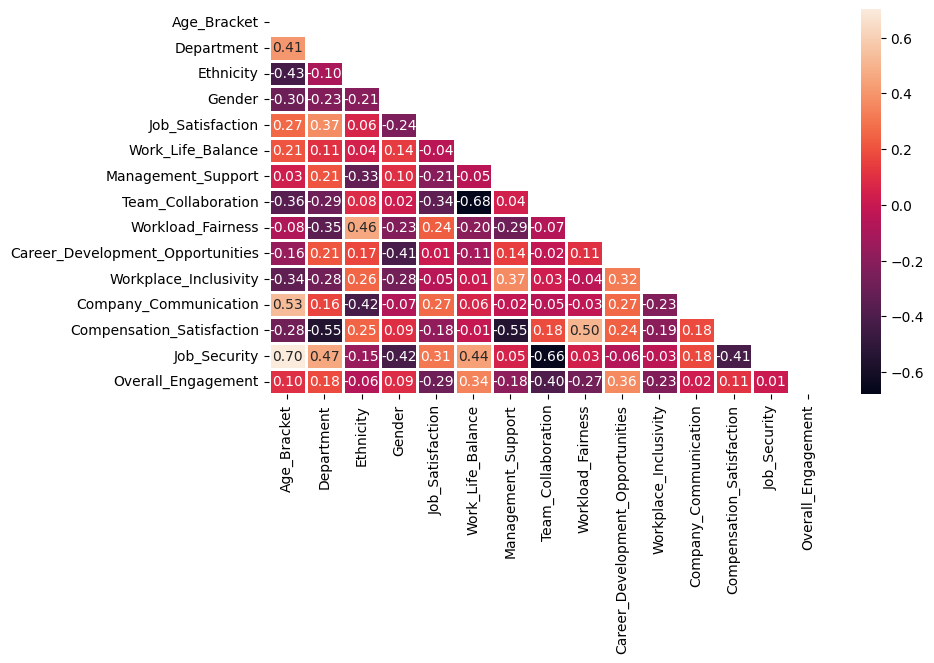

In [17]:
cols=['Age_Bracket','Department','Ethnicity','Gender','Job_Satisfaction', 'Work_Life_Balance', 'Management_Support', 
     'Team_Collaboration', 'Workload_Fairness', 'Career_Development_Opportunities', 
     'Workplace_Inclusivity', 'Company_Communication', 'Compensation_Satisfaction', 
     'Job_Security', 'Overall_Engagement']

plt.figure(figsize = (9, 5))
corr= df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True,fmt=".2f")
plt.show()

##### Statistical Test

In [27]:
import statsmodels.api as sm
df['Intercept'] = 1
def mod(col1,col2):
   model = sm.OLS(df[col1], df[['Intercept', col2]])
   model_result = model.fit()
   print(model_result.summary())


# x=df['Age_Bracket']
# y=df['Department']
# x=sm.add_constant(x)
# model=sm.OLS(y,x).fit()
# model.summary()

In [26]:
# mod('Work_Life_Balance','Age_Bracket')
# mod('Workload_Fairness','Compensation_Satisfaction')
mod('Department','Age_Bracket')


                            OLS Regression Results                            
Dep. Variable:             Department   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.607
Date:                Sat, 19 Oct 2024   Prob (F-statistic):              0.130
Time:                        21:00:13   Log-Likelihood:                -31.424
No. Observations:                  15   AIC:                             66.85
Df Residuals:                      13   BIC:                             68.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6051      0.735      2.185      

In [19]:


def fun(column):
  satisfaction = [0,3]
  non_satisfaction=[1,4]
  neutral=[2]
  satisfied_count = df[df[column].isin(satisfaction)].shape[0]
  dis_satisfied_count = df[df[column].isin(non_satisfaction)].shape[0]
  neutral_count = df[df[column].isin(neutral)].shape[0]
  
  
  total_count = df.shape[0]
  percentage1 = (satisfied_count / total_count) * 100
  percentage2 = (dis_satisfied_count / total_count) * 100
  percentage3 = (neutral_count / total_count) * 100
  
  # print(f"Percentage of satisfied employees: {percentage1:.2f}%")
  # print(f"Percentage of not satisfied employees: {percentage2 :.2f}%")
  
  
  trace = go.Pie(labels=['Not Satisfied', 'Satisfied','Neutral'],
               values=[percentage2, percentage1,percentage3],
               textfont=dict(size=20),
               opacity=0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=1.5))
              )

  layout = dict(title=f'{column}')
  fig = dict(data=[trace], layout=layout)
  py.iplot(fig)

In [20]:
fun('Work_Life_Balance')
fun('Team_Collaboration')

#### `Task:Are employees in a certain age bracket or department more satisfied than others?`

In [21]:
fig = px.scatter(df, x='Job_Satisfaction', y='Age_Bracket', color='Job_Satisfaction',template='plotly_dark')


fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
fig.update_yaxes(tickmode='array', tickvals=df['Age_Bracket'].unique())

In [22]:
fig = px.scatter(df, x='Age_Bracket', y='Department', color='Job_Satisfaction',labels={'Job_Satisfaction': 'Job Satisfaction', 'Age_Bracket': 'Age Bracket'},template='plotly_dark')
fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
fig.update_yaxes(tickmode='array')
fig.show()

##### `Task:Does any demographic group (age, gender, ethnicity) show patterns in certain areas (e.g., Work-Life Balance or Compensation Satisfaction)?`

In [23]:
df.head(10)

,Name,Age_Bracket,Gender,Ethnicity,Job_Title,Department,Date_Survey_Completed,Job_Satisfaction,Work_Life_Balance,Management_Support,Team_Collaboration,Workload_Fairness,Career_Development_Opportunities,Workplace_Inclusivity,Company_Communication,Compensation_Satisfaction,Job_Security,Overall_Engagement,Intercept
0,John Doe,1,1,0,Product Manager,0,2024-10-05,1,3,2,2,2,1,0,3,3,0,3,1
1,Jane Smith,0,1,1,Operations Manager,1,2024-10-07,0,4,3,2,2,1,2,2,2,0,2,1
2,Carlos Reyes,3,1,2,UX Designer,2,2024-10-08,2,4,0,1,3,0,0,4,2,3,3,1
3,Emily Zhang,2,0,3,UX Designer,3,2024-10-07,2,0,0,4,4,3,0,4,4,0,2,1
4,Michael Johnson,0,1,3,UX Designer,0,2024-10-07,0,3,1,2,4,1,1,1,4,2,1,1
5,Sara Ahmed,3,0,1,Business Consultant,6,2024-10-09,1,4,2,2,0,0,1,2,0,4,2,1
6,Tom Davis,1,0,3,UX Designer,3,2024-10-08,3,3,4,3,3,4,3,4,2,2,0,1
7,Linda Lopez,0,0,4,Customer Support,0,2024-10-10,1,0,2,4,4,0,2,0,1,1,0,1
8,Raj Patel,2,1,2,Product Manager,7,2024-10-07,4,3,4,0,3,0,0,2,0,3,1,1
9,Amara Njeri,0,0,4,HR Specialist,4,2024-10-10,3,3,0,0,3,4,2,0,2,2,4,1


In [24]:
def box(col1,col2):
    fig = px.box(df, x=col1 ,y=col2, color=col1,title=f'{col2} by {col1}',template='plotly_dark')
    fig.show()




In [25]:
box('Gender','Work_Life_Balance')

### Hypotheses:

In [26]:

from scipy.stats import ttest_ind

In [27]:
it_satis = df[df["Department"]==7]["Job_Satisfaction"]
hr_satis = df[df["Department"]==3]["Job_Satisfaction"]

In [28]:
t_stat, p_value = ttest_ind(it_satis, hr_satis)

In [29]:
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 1.7320508075688774, p-value: 0.33333333333333326
